# **SVBO transaction segmentation**

In [4]:
# imports
import pandas as pd
import matplotlib.pyplot as plt
# import class
from sklearn.cluster import KMeans

# ===== function to calculate optimal number of clusters
def find_optimal_clusters(wcss_values):
     # Calculate the first derivative (rate of change) of the WCSS values
    derivatives = [wcss_values[i] - wcss_values[i + 1] for i in range(len(wcss_values) - 1)]

     # Calculate the second derivative (rate of change of the first derivative)
    second_derivatives = [derivatives[i] - derivatives[i + 1] for i in range(len(derivatives) - 1)]

     # Find the first index where the second derivative is zero or less, which indicates the elbow point

    for  i in range(len(second_derivatives)):
      # init variable
      elbow_index = 0;
      # if found set index and break
      if second_derivatives[i] <= 0:
        elbow_index = i
        break
      # If not  found, use the last index as a fallback
      elbow_index = len(second_derivatives) - 1

     # The optimal number of clusters is the index
    optimal_clusters = elbow_index - 2
    return optimal_clusters
# =======

In [5]:
botrans_df = pd.read_csv('/content/output.csv', sep = ';')
botrans_df.head()


,issuer_card_id,mcc,merchant_city,merchant_country,oper_amount_amount_value,oper_amount_currency,oper_type
0,100000000026,5192,moscow,643,20000.0,643,OPTP0026
1,100000000189,5192,moscow,643,20000.0,643,OPTP0011
2,100000000342,4814,GABISHEVO,643,1045.0,643,OPTP0000
3,100000000342,4816,Kazan,643,1000.0,643,OPTP0060
4,100000000342,4816,Kazan,643,1222.0,643,OPTP0060


In [6]:
# botrans_df.info()

In [7]:
# botrans_df.describe()

In [8]:
# botrans_df.shape

In [9]:
# botrans_df.isnull().sum()

In [10]:
# dropping columns - leave dome for clusterization
#cut_botrans = botrans_df.drop(['oper_date','issuer_card_id','mcc','merchant_country','oper_amount_currency'], axis=1, inplace=True)
#cut_botrans = botrans_df.drop(['oper_date','issuer_card_id','mcc','merchant_city','merchant_country','oper_amount_currency'], axis=1, inplace=False)
cut_botrans = botrans_df.drop(['issuer_card_id','merchant_country','merchant_city','oper_amount_currency','oper_type'], axis=1, inplace=False)

# cut first 4 letters OPTPT from 'oper_type' values
#cut_botrans['oper_type'] = cut_botrans['oper_type'].str[4:]

# check cutrrent state
cut_botrans.head()

,mcc,oper_amount_amount_value
0,5192,20000.0
1,5192,20000.0
2,4814,1045.0
3,4816,1000.0
4,4816,1222.0


Text(0, 0.5, 'oper_amount_amount_value')

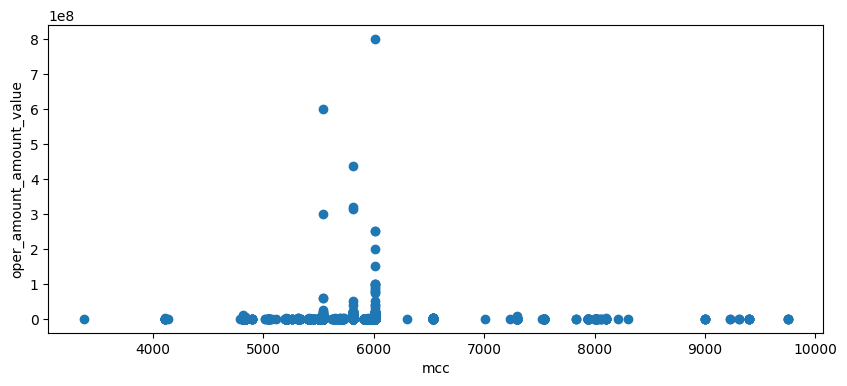

In [11]:
# set source variable
X = cut_botrans

# plot our DF to check
plt.figure(figsize = (10,4))
plt.scatter(X.iloc[:,0], X.iloc[:,1])
# take labels from DataFrame
plt.xlabel(X.columns.values[0])
plt.ylabel(X.columns.values[1])

[1.7719723555709742e+18, 4.392093858646714e+17, 1.811285633715042e+17, 8.817730006302358e+16, 5.790420687306748e+16, 3.889456193657035e+16, 2.5669389380036476e+16, 1.5926942687209468e+16, 1.0316084073978486e+16, 6523998300399742.0]
The optimal number of clusters is: 5


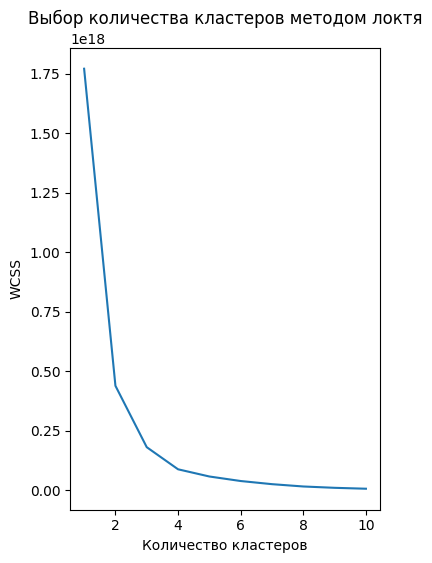

In [12]:
# define number of clusters
# set empty list for WCSS (error)
wcss = []
# range from 1 to 10 (index starts with 0)
for i in range(1, 11):
  kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 42)
  # fit model with different clusters number
  kmeans.fit(X)
  # calculate error for each ckuster (inertia_) and putt it list
  wcss.append(kmeans.inertia_)

# plot WCSS
plt.figure(figsize = (4,6))
plt.plot(range(1, 11), wcss)
# add titles
plt.title('Выбор количества кластеров методом локтя')
plt.xlabel('Количество кластеров')
plt.ylabel('WCSS')

# print WCSS for check
print(wcss)
# call function to analyze WCSS graph and define optimum number of clusters
optimal_clusters = find_optimal_clusters(wcss)
print(f"The optimal number of clusters is: {optimal_clusters}")

In [13]:
# run fit with defined optimal number of clusters
kmeans = KMeans(n_clusters = optimal_clusters, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 42)
y_pred = kmeans.fit_predict(X)
#y_pred.labels_

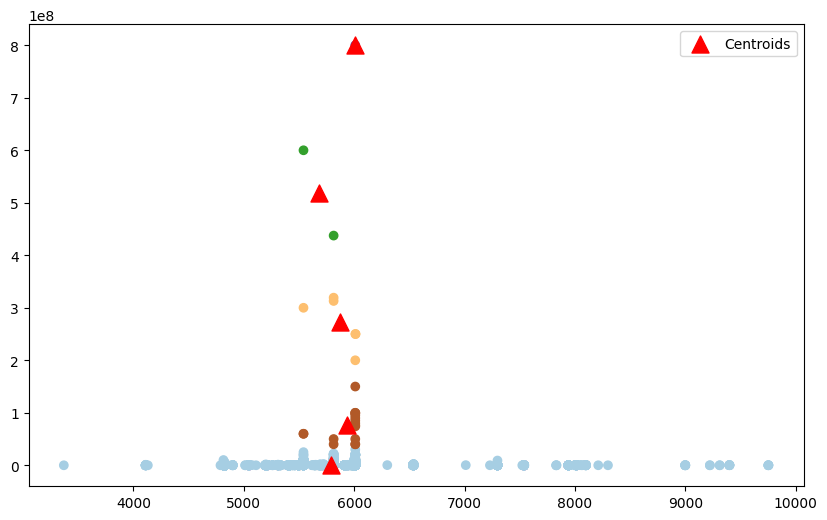

In [14]:
# plot graph with centroids
plt.figure(figsize = (10,6))
# c - specifies color of dots according to cluster number
plt.scatter(X.iloc[:,0], X.iloc[:,1], c = y_pred, cmap='Paired')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s = 150, c = 'red', marker = '^', label = 'Centroids')
# put legend
plt.legend(loc = 'upper right')


In [15]:
# add new column to dataframe with calculated cluster number
cut_botrans["Cluster"] = kmeans.labels_
cut_botrans.head()

,mcc,oper_amount_amount_value,Cluster
0,5192,20000.0,0
1,5192,20000.0,0
2,4814,1045.0,0
3,4816,1000.0,0
4,4816,1222.0,0
